In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [412]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [413]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [414]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [415]:
def combine_data(train,test):
    return pd.concat([train,test],sort=True).reset_index(drop=True)
def divide_data(data):
    return data.loc[:890],data.loc[891:].drop(['Survived'],axis=1)

all_data = combine_data(train_df,test_df)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [416]:
# train_df.drop('Cabin',axis=1,inplace=True)
# train_df.shape
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
train_df = set_Cabin_type(train_df)
test_df = set_Cabin_type(test_df)
def get_Cabin_dummies(df):
    dummies_Cabin = pd.get_dummies(df['Cabin'],prefix='Cabin')
    df = pd.concat([df,dummies_Cabin],axis=1)
    df.drop(['Cabin'],axis=1,inplace=True)
    return df
train_df = get_Cabin_dummies(train_df)
test_df = get_Cabin_dummies(test_df)

In [417]:
# test_df.drop('Cabin',axis=1,inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


In [418]:
whole_df  = train_df.append(test_df)
whole_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,1,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,1,0


In [419]:
whole_df['Title'] = whole_df.Name.str.extract(r'([A-Za-z]+)\.',expand=False)
whole_df.shape

(1309, 14)

In [420]:
whole_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,Mr


In [421]:
Common_Title = ['Mr','Mrs','Master']
whole_df['Title'].replace(['Lady','Mlle','Ms','Mme','Miss'],'Mrs',inplace=True)
whole_df['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
whole_df['Title'][~whole_df.Title.isin(Common_Title)] = 'Others'

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2678840183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_df['Title'][~whole_df.Title.isin(Common_Title)] = 'Others'


In [422]:
train_df = whole_df[:len(train_df)]
test_df = whole_df[len(train_df):]
AgeMedian_by_titles = train_df.groupby('Title')['Age'].median()

In [423]:
for title in AgeMedian_by_titles.index:
    train_df['Age'][(train_df.Age.isnull()) & (train_df.Title == title)] = AgeMedian_by_titles[title]
    test_df['Age'][(test_df.Age.isnull()) & (test_df.Title == title)] = AgeMedian_by_titles[title]

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2070518596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'][(train_df.Age.isnull()) & (train_df.Title == title)] = AgeMedian_by_titles[title]
D:\application\anaconda3\envs\d2l\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2070518596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [424]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Cabin_No     891 non-null    uint8  
 12  Cabin_Yes    891 non-null    uint8  
 13  Title        891 non-null    object 
dtypes: float64(3), int64(4), object(5), uint8(2)
memory usage: 92.2+ KB


In [425]:
train_df['Embarked'].fillna('S',inplace=True)

D:\application\anaconda3\envs\d2l\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [426]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes,Title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,1,0,Mr


In [427]:
np.mean(whole_df['Fare'])

33.29547928134557

In [428]:
test_df['Fare'].fillna(32.854, inplace=True)

D:\application\anaconda3\envs\d2l\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [429]:
train_df['Fare'].sort_values(ascending=False).head(10)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [430]:
train_df.loc[train_df.Fare>512, 'Fare'] = 263

D:\application\anaconda3\envs\d2l\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [431]:
train_df['Sex'] = train_df['Sex'].map({'female':1,'male':0}).astype('int')
test_df['Sex'] = test_df['Sex'].map({'female':1, 'male':0}).astype('int')

train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/1821258398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sex'] = train_df['Sex'].map({'female':1,'male':0}).astype('int')
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/1821258398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sex'] = test_df['Sex'].map({'female':1, 'male':0}).astype('int')
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/1821258398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/1163021974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['AgeBin_5'] = pd.qcut(train_df['Age'], 5)
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/1163021974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['AgeBin_5'] = pd.qcut(test_df['Age'], 5)


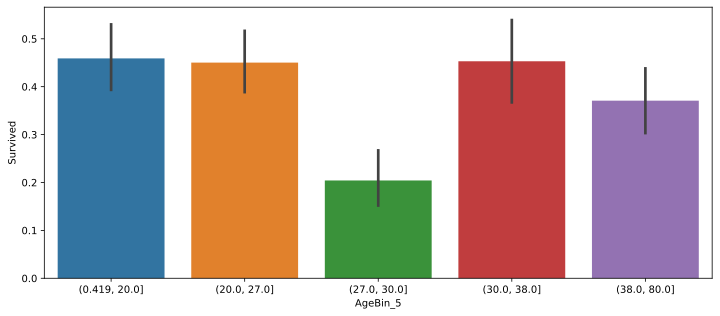

In [432]:
train_df['AgeBin_5'] = pd.qcut(train_df['Age'], 5)
test_df['AgeBin_5'] = pd.qcut(test_df['Age'], 5)

fig = plt.figure(figsize=(12,5))
sns.barplot(x='AgeBin_5', y='Survived', data=train_df)
plt.show()

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/3423787665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FareBin_5'] = pd.qcut(train_df['Fare'], 5)
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/3423787665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['FareBin_5'] = pd.qcut(test_df['Fare'], 5)


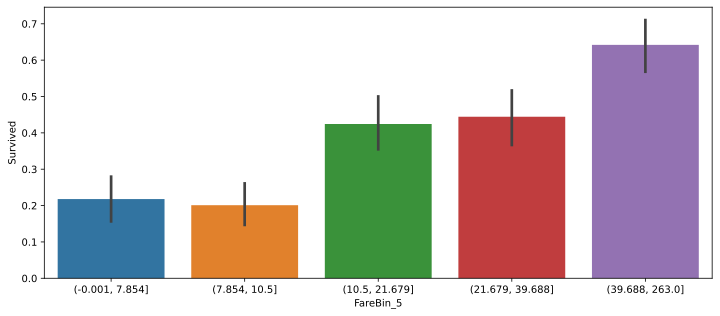

In [433]:
train_df['FareBin_5'] = pd.qcut(train_df['Fare'], 5)
test_df['FareBin_5'] = pd.qcut(test_df['Fare'], 5)

fig = plt.figure(figsize=(12,5))
sns.barplot(x='FareBin_5', y='Survived', data=train_df)
plt.show()

In [434]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes,Title,AgeBin_5,FareBin_5
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,Mr,"(20.0, 27.0]","(-0.001, 7.854]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,1,Mrs,"(30.0, 38.0]","(39.688, 263.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,Mrs,"(20.0, 27.0]","(7.854, 10.5]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs,"(30.0, 38.0]","(39.688, 263.0]"
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,Mr,"(30.0, 38.0]","(7.854, 10.5]"


In [435]:
label = LabelEncoder()
train_df['AgeBin_Code_5'] = label.fit_transform(train_df['AgeBin_5'])
test_df['AgeBin_Code_5'] = label.fit_transform(test_df['AgeBin_5'])

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/195786852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['AgeBin_Code_5'] = label.fit_transform(train_df['AgeBin_5'])
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/195786852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['AgeBin_Code_5'] = label.fit_transform(test_df['AgeBin_5'])


In [436]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_No,Cabin_Yes,Title,AgeBin_5,FareBin_5,AgeBin_Code_5
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,Mr,"(20.0, 27.0]","(-0.001, 7.854]",1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,1,Mrs,"(30.0, 38.0]","(39.688, 263.0]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,Mrs,"(20.0, 27.0]","(7.854, 10.5]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs,"(30.0, 38.0]","(39.688, 263.0]",3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,Mr,"(30.0, 38.0]","(7.854, 10.5]",3


In [437]:
label = LabelEncoder()
train_df['FareBin_Code_5'] = label.fit_transform(train_df['FareBin_5'])
test_df['FareBin_Code_5'] = label.fit_transform(test_df['FareBin_5'])

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2260272710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FareBin_Code_5'] = label.fit_transform(train_df['FareBin_5'])
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2260272710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['FareBin_Code_5'] = label.fit_transform(test_df['FareBin_5'])


In [438]:
train_df['FamilySize'] = train_df.SibSp + train_df.Parch + 1
test_df['FamilySize'] = test_df.SibSp + test_df.Parch + 1

train_df['Alone'] = train_df.FamilySize.map(lambda x: 1 if x == 1 else 0)
test_df['Alone'] = test_df.FamilySize.map(lambda x: 1 if x == 1 else 0)

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2192037357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FamilySize'] = train_df.SibSp + train_df.Parch + 1
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2192037357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['FamilySize'] = test_df.SibSp + test_df.Parch + 1
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2192037357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [439]:
train_df['Title_Code'] = train_df.Title.map({'Mr':0, 'Mrs':1, 'Master':2, 'Others':3}).astype('int')
test_df['Title_Code'] = test_df.Title.map({'Mr':0, 'Mrs':1, 'Master':2, 'Others':3}).astype('int')

C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2602293461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Title_Code'] = train_df.Title.map({'Mr':0, 'Mrs':1, 'Master':2, 'Others':3}).astype('int')
C:\Users\wss\AppData\Local\Temp/ipykernel_5984/2602293461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Title_Code'] = test_df.Title.map({'Mr':0, 'Mrs':1, 'Master':2, 'Others':3}).astype('int')


In [440]:
whole_df = train_df.append(test_df)
whole_df['Surname'] = whole_df.Name.str.extract(r'([A-Za-z]+),', expand=False)
whole_df['TixPref'] = whole_df.Ticket.str.extract(r'(.*\d)', expand=False)
whole_df['SurTix'] = whole_df['Surname'] + whole_df['TixPref']

In [441]:
whole_df['IsFamily'] = whole_df.SurTix.duplicated(keep=False)*1

In [442]:
whole_df[whole_df['IsFamily']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FareBin_5,AgeBin_Code_5,FareBin_Code_5,FamilySize,Alone,Title_Code,Surname,TixPref,SurTix,IsFamily
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,"(39.688, 263.0]",3,4,2,0,1,Cumings,PC 17599,CumingsPC 17599,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,"(39.688, 263.0]",3,4,2,0,1,Futrelle,113803,Futrelle113803,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,...,"(10.5, 21.679]",0,2,5,0,2,Palsson,349909,Palsson349909,1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,...,"(10.5, 21.679]",1,2,3,0,1,Johnson,347742,Johnson347742,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,...,"(21.679, 39.688]",0,3,2,0,1,Nasser,237736,Nasser237736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1295,NaN,1,"Carrau, Mr. Jose Pedro",0,17.0,0,0,113059,47.1000,...,"(46.34, 512.329]",0,4,1,1,0,Carrau,113059,Carrau113059,1
407,1299,NaN,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,...,"(46.34, 512.329]",4,4,3,0,0,Widener,113503,Widener113503,1
409,1301,NaN,3,"Peacock, Miss. Treasteall",1,3.0,1,1,SOTON/O.Q. 3101315,13.7750,...,"(11.342, 21.679]",0,2,3,0,1,Peacock,SOTON/O.Q. 3101315,PeacockSOTON/O.Q. 3101315,1
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,...,"(46.34, 512.329]",3,4,2,0,1,Minahan,19928,Minahan19928,1


D:\application\anaconda3\envs\d2l\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


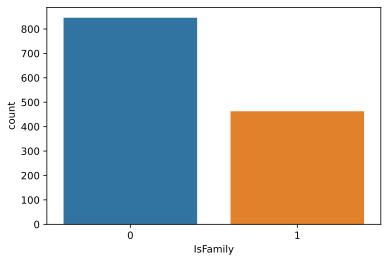

In [443]:
sns.countplot(whole_df.IsFamily)
plt.show()

In [444]:
whole_df['Child'] = whole_df.Age.map(lambda x: 1 if x <= 13 else 0)
FamilyWithChild = whole_df[(whole_df.IsFamily==1)&(whole_df.Child==1)]['SurTix'].unique()
print('There are {} families with children.'.format(len(FamilyWithChild)))

There are 59 families with children.


In [445]:
whole_df['FamilyId'] = 0
x = 1
for tix in FamilyWithChild:
    whole_df.loc[whole_df.SurTix==tix, ['FamilyId']] = x
    x += 1

In [446]:
whole_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FareBin_Code_5,FamilySize,Alone,Title_Code,Surname,TixPref,SurTix,IsFamily,Child,FamilyId
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,2,0,0,Braund,A/5 21171,BraundA/5 21171,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,4,2,0,1,Cumings,PC 17599,CumingsPC 17599,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,1,Heikkinen,STON/O2. 3101282,HeikkinenSTON/O2. 3101282,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,4,2,0,1,Futrelle,113803,Futrelle113803,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,1,1,0,Allen,373450,Allen373450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,...,1,1,1,0,Spector,A.5. 3236,SpectorA.5. 3236,0,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,...,4,1,1,3,Ocana,PC 17758,OcanaPC 17758,0,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,0,1,1,0,Saether,SOTON/O.Q. 3101262,SaetherSOTON/O.Q. 3101262,0,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,30.0,0,0,359309,8.0500,...,1,1,1,0,Ware,359309,Ware359309,0,0,0


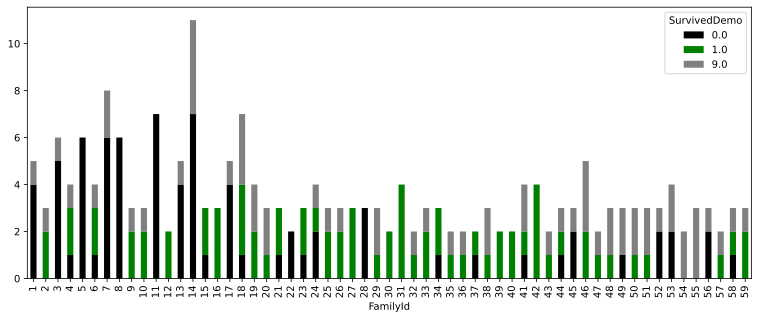

In [447]:
whole_df['SurvivedDemo'] = whole_df['Survived'].fillna(9)
pd.crosstab(whole_df.FamilyId, whole_df.SurvivedDemo).drop([0]).plot(kind='bar', stacked=True, color=['black','g','grey'], figsize=(13,5))
plt.show()

In [448]:
whole_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Alone,Title_Code,Surname,TixPref,SurTix,IsFamily,Child,FamilyId,SurvivedDemo
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,0,0,Braund,A/5 21171,BraundA/5 21171,0,0,0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,0,1,Cumings,PC 17599,CumingsPC 17599,1,0,0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,1,Heikkinen,STON/O2. 3101282,HeikkinenSTON/O2. 3101282,0,0,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,2,0,1,Futrelle,113803,Futrelle113803,1,0,0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,1,0,Allen,373450,Allen373450,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,...,1,1,0,Spector,A.5. 3236,SpectorA.5. 3236,0,0,0,9.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,...,1,1,3,Ocana,PC 17758,OcanaPC 17758,0,0,0,9.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,1,1,0,Saether,SOTON/O.Q. 3101262,SaetherSOTON/O.Q. 3101262,0,0,0,9.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,30.0,0,0,359309,8.0500,...,1,1,0,Ware,359309,Ware359309,0,0,0,9.0


In [449]:
whole_df['ConnectedSurvival'] = 1
Survived_by_FamilyId = whole_df.groupby('FamilyId').Survived.sum()
Survived_by_FamilyId

FamilyId
0     270.0
1       0.0
2       2.0
3       0.0
4       2.0
5       0.0
6       2.0
7       0.0
8       0.0
9       2.0
10      2.0
11      0.0
12      2.0
13      0.0
14      0.0
15      2.0
16      3.0
17      0.0
18      3.0
19      2.0
20      1.0
21      2.0
22      0.0
23      2.0
24      1.0
25      2.0
26      2.0
27      3.0
28      0.0
29      1.0
30      2.0
31      4.0
32      1.0
33      2.0
34      2.0
35      1.0
36      1.0
37      1.0
38      1.0
39      2.0
40      2.0
41      1.0
42      4.0
43      1.0
44      1.0
45      0.0
46      2.0
47      1.0
48      1.0
49      0.0
50      1.0
51      1.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      1.0
58      1.0
59      2.0
Name: Survived, dtype: float64

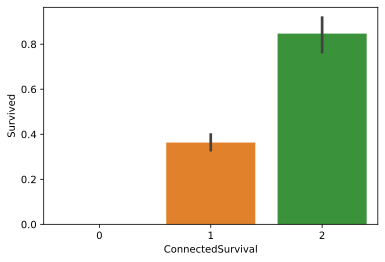

In [450]:
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        whole_df.loc[whole_df.FamilyId==i, ['ConnectedSurvival']] = 2
    elif Survived_by_FamilyId[i] == 0:
        whole_df.loc[whole_df.FamilyId==i, ['ConnectedSurvival']] = 0
train_df = whole_df[:len(train_df)]
test_df = whole_df[len(train_df):]
sns.barplot(x='ConnectedSurvival', y='Survived', data=train_df)
plt.show()

In [451]:
whole_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Alone,Title_Code,Surname,TixPref,SurTix,IsFamily,Child,FamilyId,SurvivedDemo,ConnectedSurvival
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,Braund,A/5 21171,BraundA/5 21171,0,0,0,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,1,Cumings,PC 17599,CumingsPC 17599,1,0,0,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,Heikkinen,STON/O2. 3101282,HeikkinenSTON/O2. 3101282,0,0,0,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,Futrelle,113803,Futrelle113803,1,0,0,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,Allen,373450,Allen373450,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,30.0,0,0,A.5. 3236,8.0500,...,1,0,Spector,A.5. 3236,SpectorA.5. 3236,0,0,0,9.0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,...,1,3,Ocana,PC 17758,OcanaPC 17758,0,0,0,9.0,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,1,0,Saether,SOTON/O.Q. 3101262,SaetherSOTON/O.Q. 3101262,0,0,0,9.0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,30.0,0,0,359309,8.0500,...,1,0,Ware,359309,Ware359309,0,0,0,9.0,1


In [452]:
X_train = train_df.drop(['Name', 'Parch', 'PassengerId', 'SibSp',
                           'Ticket', 'Title', 'AgeBin_5', 'FareBin_5',
                           'Surname', 'TixPref', 'SurTix', 'IsFamily', 'Child',
                           'FamilyId', 'Survived', 'SurvivedDemo', 'Age', 'Fare'], axis=1)
# X_train = train_df.drop(['Name','PassengerId','Survived','AgeBin_5', 'Title','FareBin_5','Surname','TixPref','SurTix','Ticket'],axis=1)
X_test = test_df.drop(['Name', 'Parch', 'PassengerId', 'SibSp',
                           'Ticket', 'Title', 'AgeBin_5', 'FareBin_5',
                           'Surname', 'TixPref', 'SurTix', 'IsFamily', 'Child',
                           'FamilyId', 'Survived', 'SurvivedDemo', 'Age', 'Fare'], axis=1)
Y_train = train_df['Survived']

In [453]:
X_train

,Pclass,Sex,Embarked,Cabin_No,Cabin_Yes,AgeBin_Code_5,FareBin_Code_5,FamilySize,Alone,Title_Code,ConnectedSurvival
0,3,0,0,1,0,1,0,2,0,0,1
1,1,1,1,0,1,3,4,2,0,1,1
2,3,1,0,1,0,1,1,1,1,1,1
3,1,1,0,0,1,3,4,2,0,1,1
4,3,0,0,1,0,3,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,2,1,1,0,1
887,1,1,0,0,1,0,3,1,1,1,1
888,3,1,0,1,0,1,3,4,0,1,0
889,1,0,1,0,1,1,3,1,1,0,1


In [454]:
final = ['Title_Code', 'ConnectedSurvival', 'FareBin_Code_5', 'Pclass',  'FamilySize']
X = X_train
y = Y_train

In [455]:
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
model_DT = tree.DecisionTreeClassifier(random_state=1)
model_KNN = neighbors.KNeighborsClassifier()
model_RFR = ensemble.RandomForestClassifier(random_state=30,n_jobs=-1)
#Adaboot回归
model_ABR = ensemble.AdaBoostClassifier(random_state=70)
#GBRT回归
model_GBR = ensemble.GradientBoostingClassifier(random_state=8)
#criterion='friedman_mse',learning_rate=1,max_depth=1,max_features='log2',min_samples_leaf=1,subsample=0.5,loss='ls',
#Bagging回归
model_BR = ensemble.BaggingClassifier(random_state=7)
#ExtraTree极端随机树回归
model_ETR = tree.ExtraTreeClassifier(random_state=33)

In [456]:
scores = cross_val_score(model_DT,X,y,cv=5)
print(np.mean(scores))

0.8047203565375682


In [457]:
scores = cross_val_score(model_KNN,X,y,cv=5)
print(np.mean(scores))

0.8215868432615654


D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [395]:
scores = cross_val_score(model_ABR,X,y,cv=5)
print(np.mean(scores))

D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8350197727700708


D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [396]:
scores = cross_val_score(model_RFR,X,y,cv=5)
print(np.mean(scores))

0.8372732408511705


In [397]:
scores = cross_val_score(model_GBR,X,y,cv=5)
print(np.mean(scores))

0.8338961772644529


In [398]:
scores = cross_val_score(model_BR,X,y,cv=5)
print(np.mean(scores))

0.8204381394764925


In [399]:
scores = cross_val_score(model_ETR,X,y,cv=5)
print(np.mean(scores))

0.8103132257862031


In [404]:
from sklearn.ensemble import StackingClassifier
estimators=[('knn',model_KNN),('tree',model_DT)]
model_stack =StackingClassifier(estimators=estimators,final_estimator=model_RFR)
scores = cross_val_score(model_stack,X,y,cv=5)
print(np.mean(scores))

D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\

0.8148138848785387


D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\envs\d2l\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\application\anaconda3\

In [465]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # 要搜索的模型
                        params, # 要尝试的参数,
                        n_jobs=6,
                        error_score=0.) # 如果报错，结果是0
    grid.fit(X, y) # 拟合模型和参数
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 拟合的平均时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 预测的平均时间（秒）
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [467]:
model = RandomForestClassifier(n_estimators=150, bootstrap=True, criterion='entropy',
                               min_samples_leaf=5, min_samples_split=4, random_state=42)
gbr_params={"n_estimators":[120, 300, 500, 800, 1200],"loss":['deviance','exponential'],"learning_rate":[0.001, 0.01, 0.1, 1],"subsample":[0.5, 0.6, 0.7, 0.8, 0.9, 1],"max_depth":[3, 5, 8, 15, 25, 30, None],"min_samples_leaf":[1, 2, 5, 10],"max_features":['log2','sqrt',None]}
model2 = ensemble.GradientBoostingClassifier(n_estimators=404)
# scores = cross_val_score(model2,X,y,cv=5)
# print(np.mean(scores))
get_best_model_and_accuracy(model2,gbr_params,X,y)

KeyboardInterrupt: 

In [402]:
model.fit(X,y)
prediction = model.predict(X_test).astype(int)
sub = pd.read_csv('gender_submission.csv')
sub['Survived'] = prediction
sub.to_csv('submission.csv', index = False)

0    278
1    140
dtype: int64

In [326]:
# import torch
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.model_selection import train_test_split
# import torch.nn as nn
# from d2l import torch as d2l
# import torch.nn.functional as F
# # X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.3)
# # test_dataset = TensorDataset(torch.tensor(X_test,dtype=torch.float32),torch.tensor(y_test,dtype=torch.float32))
# # testloader = DataLoader(test_dataset, batch_size=4,shuffle=False, num_workers=2)
# train_dataset = TensorDataset(torch.tensor(X.values,dtype=torch.float32),torch.tensor(y.values,dtype=torch.float32))
# trainloader = DataLoader(train_dataset, batch_size=4,shuffle=True, num_workers=2)
#
# test_features = torch.tensor(X_test.values, dtype=torch.float32)
#
# # 定义模型
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(X.shape[1], 64),
#             nn.ReLU(),
#             nn.Linear(64, 16),
#             nn.ReLU(),
#             nn.Linear(16, 64),
#             nn.ReLU(),
#             nn.Linear(64, 16),
#             nn.ReLU(),
#             nn.Linear(16, 2),
#             nn.Softmax(dim=1)
#         )
#
#     def forward(self, x):
#         return self.fc(x)
#
#
# net = Net()

In [344]:
# def evaluate_accuracy_gpu(net, data_iter, device=None):
#     """使用 GPU 在数据集上计算模型的准确度。"""
#     if isinstance(net, nn.Module):
#         net.eval()  # 将模型设置为评估模式
#         if not device:
#             device = next(iter(net.parameters())).device
#     metric = d2l.Accumulator(2)
#
#     with torch.no_grad():
#         for X, y in data_iter:
#             if isinstance(X, list):
#                 # BERT 微调所需
#                 X = [x.to(device) for x in X]
#             else:
#                 X = X.to(device)
#             y = y.to(device)
#             metric.add(d2l.accuracy(net(X), y), d2l.size(y))
#     return metric[0] / metric[1]
# def train(net, train_iter,num_epochs,device = None):
#     """训练并保存模型"""
#     def init_weights(m):
#         if type(m) == nn.Linear or type(m) == nn.Conv2d:
#             nn.init.xavier_uniform_(m.weight)
#
#     net.apply(init_weights)
#     print('training on', device)
#     net.to(device)
#     optimizer = torch.optim.Adam(net.parameters())
#
# #     optimizer = torch.optim.SGD(net.parameters(), lr=lr)
#     loss = nn.CrossEntropyLoss()
#     animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                             legend=['train loss', 'train acc', 'test acc'])
#     timer, num_batches = d2l.Timer(), len(train_iter)
#     for epoch in range(num_epochs):
#         # 训练损失总和、训练准确率总和、示例数
#         metric = d2l.Accumulator(3)
#         net.train()
#         for i, (X, y) in enumerate(train_iter):
#             timer.start()
#             optimizer.zero_grad()
#             X= X.to(device)
#             y = y.to(device)
#
# #             X = X.cuda()
# #             y = y.cuda()
# #             print(X.device,y.device)
# #             y_hat,test = net(X.to(device))
# #             y_hat = y_hat.to(device)
#             y_hat = net(X)
#             l = loss(y_hat, y.long())
#             l.backward()
#             optimizer.step()
#             with torch.no_grad():
#                 metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
#             timer.stop()
#             train_l = metric[0] / metric[2]
#             train_acc = metric[1] / metric[2]
#             if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
#                 animator.add(epoch + (i + 1) / num_batches,
#                              (train_l, train_acc, None))
#     torch.save(net,r'train.pth')
# def test(test_features, device = None,trainfile_dir='train.pth'):
#     """读取并测试模型"""
#     net = torch.load(trainfile_dir)
#     net.eval()
#     test_features = test_features.to(device)
#     preds = net(test_features).detach().cpu().numpy()
#     # 将其重新格式化以导出到Kaggle
#     preds=np.argmax(preds, axis=1)
#     sub = pd.read_csv('gender_submission.csv')
#     sub['Survived'] = preds.reshape(1, -1)[0]
#     sub.to_csv('submission.csv', index = False)
# def train_test(net, train_iter, test_iter, num_epochs,device = None):
#     """训练并测试参数"""
#     def init_weights(m):
#         if type(m) == nn.Linear or type(m) == nn.Conv2d:
#             nn.init.xavier_uniform_(m.weight)
#
#     net.apply(init_weights)
#     print('training on', device)
#     net.to(device)
#     optimizer = torch.optim.Adam(net.parameters())
#
# #     optimizer = torch.optim.SGD(net.parameters(), lr=lr)
#     loss = nn.CrossEntropyLoss()
#     animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                             legend=['train loss', 'train acc', 'test acc'])
#     timer, num_batches = d2l.Timer(), len(train_iter)
#     for epoch in range(num_epochs):
#         # 训练损失总和、训练准确率总和、示例数
#         metric = d2l.Accumulator(3)
#         net.train()
#         for i, (X, y) in enumerate(train_iter):
#             timer.start()
#             optimizer.zero_grad()
#             X= X.to(device)
#             y = y.to(device)
#
# #             X = X.cuda()
# #             y = y.cuda()
# #             print(X.device,y.device)
# #             y_hat,test = net(X.to(device))
# #             y_hat = y_hat.to(device)
#             y_hat = net(X)
#             l = loss(y_hat, y.long())
#             l.backward()
#             optimizer.step()
#             with torch.no_grad():
#                 metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
#             timer.stop()
#             train_l = metric[0] / metric[2]
#             train_acc = metric[1] / metric[2]
#             if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
#                 animator.add(epoch + (i + 1) / num_batches,
#                              (train_l, train_acc, None))
#
#         test_acc = evaluate_accuracy_gpu(net, test_iter)
#         animator.add(epoch + 1, (None, None, test_acc))
#     print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
#           f'test acc {test_acc:.3f}')
#     print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
#           f'on {str(device)}')

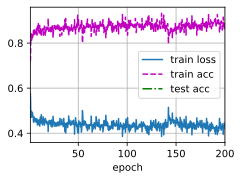

In [346]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# num_epochs=200
# train(net,trainloader,num_epochs,device)

In [347]:
# test(test_features,device)